In [1]:
%matplotlib inline
from tqdm import tqdm
import numpy as np
import pymc3 as pm
np.set_printoptions(suppress=True)

/Users/ded/anaconda3/lib/python3.6/site-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Using cuDNN version 7201 on context None
Mapped name None to device cuda: GeForce GTX 1080 Ti (0000:86:00.0)
/Users/ded/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [30]:
# Parameters
N = 10000 # True total individuals
S = 20  # Sample periods

# Capture probability (propensity)
alpha = .85
beta = 3.2
prop = pm.Beta.dist(alpha, beta).random(size = N)

In [31]:
# Capture History Data Structures
CH = [] # Full CH matrix
GCH = [] # First/Last/Count CH matrix
TH = []

for i in tqdm(range(N)):
    capture_history = pm.Bernoulli.dist(prop[i]).random(size=(S,1))
    if capture_history.any():
        first = 0
        last = S - 1
        count = capture_history.sum()
        GCH.append([first, last, count])
        CH.append(capture_history)
print(len(GCH))

100%|██████████| 10000/10000 [00:08<00:00, 1188.94it/s]

8179


In [33]:
import pickle
fname = 'data/bch-%d-%d-%.2f-%.2f.pkl' % (N, S, alpha, beta)
fname
with open(fname, 'wb') as f:
  pickle.dump((GCH, sorted(TH, key=lambda tup: tup[3])), f)
fname

'data/bch-10000-20-0.85-3.20.pkl'

In [32]:
prop.shape

(10000,)

In [27]:
prop

array([0.00645587, 0.00020484, 0.00006211, ..., 0.00055463, 0.001141  ,
       0.5207065 ])

In [28]:
import matplotlib.pyplot as plt

(array([826698.,  96297.,  41787.,  19626.,   9096.,   4066.,   1675.,
           588.,    144.,     23.]),
 array([0.        , 0.08992151, 0.17984302, 0.26976453, 0.35968603,
        0.44960754, 0.53952905, 0.62945056, 0.71937207, 0.80929358,
        0.89921509]),
 <a list of 10 Patch objects>)

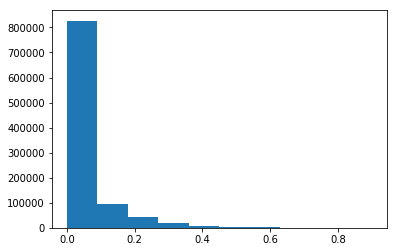

In [29]:
plt.hist(pm.Beta.dist(alpha, beta).random(size = 1000000))

In [22]:
prop.mean()

0.04757097898108085